In [3]:
# !pip install tensorflow

import random
import torch
import random
import torch
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
#load data from kaggle

import kagglehub
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

# Load the dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77/WELFake_Dataset.csv")

print("Dataset preview:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Check for missing values and drop them
df.dropna(subset=['text', 'label'], inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


100%|██████████| 92.1M/92.1M [00:00<00:00, 137MB/s]

Extracting files...


Dataset preview:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Dataset statistics:
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    1803

In [5]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

# # Split the dataset
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     df['text'], df['label'], test_size=0.2, random_state=42
# )

sample_data


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Model Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

       False       0.54      0.51      0.52     12955
        True       0.56      0.58      0.57     13688

    accuracy                           0.55     26643
   macro avg       0.55      0.55      0.55     26643
weighted avg       0.55      0.55      0.55     26643



Text(0.5, 1.0, 'Confusion Matrix')

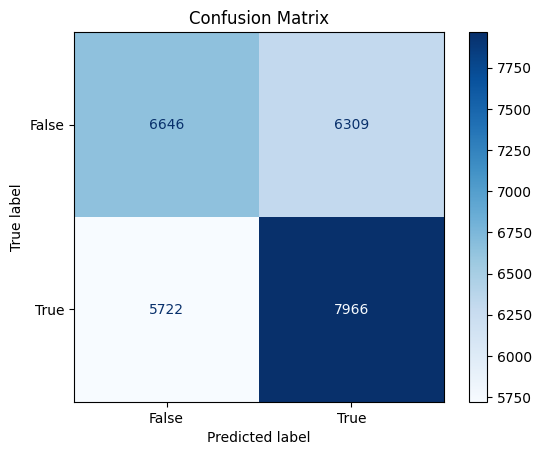

In [7]:
!pip install h5py
!ls

import h5py
import numpy as np # Import numpy and assign it to the alias 'np'


# Load the file from the current directory
file_path = '/Twitter.h5'

# Open the HDF5 file in read mode ('r')
with h5py.File(file_path, 'r') as f:
    input_ids = np.array(f['input_ids'])  # Use input_ids as embeddings
    labels = np.array(f['labels'])  # Load labels

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
log_reg = LogisticRegression(max_iter=200, solver='saga', penalty='l2', C=1.0)
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the Model
predictions = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['False', 'True']))

# Step 5: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['False', 'True'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')


In [8]:
# Extract feature importance
feature_weights = log_reg.coef_[0]  # Weights for the first class

# Show the top 10 most influential features
top_positive_indices = np.argsort(feature_weights)[-10:]  # Top 10 positive weights
top_negative_indices = np.argsort(feature_weights)[:10]  # Top 10 negative weights

print("\nTop 10 Features Predicting 'Real' News:")
print(top_positive_indices)

print("\nTop 10 Features Predicting 'Fake' News:")
print(top_negative_indices)


# Find misclassified samples
misclassified_indices = np.where(predictions != y_test)[0]

# Display a few misclassified examples
print("\nExamples of Misclassified Samples:")
for idx in misclassified_indices[:5]:  # Show up to 5 examples
    print(f"Sample {idx}:")
    print(f"Input IDs: {X_test[idx]}")
    print(f"True Label: {'Fake' if y_test[idx] == 0 else 'Real'}")
    print(f"Predicted Label: {'Fake' if predictions[idx] == 0 else 'Real'}\n")


Top 10 Features Predicting 'Real' News:
[258 327 326 222 299 294 313 243 331   0]

Top 10 Features Predicting 'Fake' News:
[318 303 287 325 339 315 335 270 286 179]

Examples of Misclassified Samples:
Sample 3:
Input IDs: [  101  1030  9108 10830  2890  1030  5091 29100  5582  1030  2613 11788
  7277  7662  2243  1030  3343  2099  2595  1030 21677  8873 22842  2099
  1015  1012  3282  4341  2013  2512  1011 20892  7000 11033  2097  2025
  9125  4281  4638  1012 27969  2015  2291  2442  2022 13949  1006  2156
 14274  6076  1007  1012  1016  1012  5218  2000  9146  2000  5309  1012
  1017  1012  7077 19990  1024  2163  9375  6550 11543  1012  2025  2035
  2163  5478  6905  2869  2000  7806  4409  1012   102     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     